# Monte Carlo Simulation for European Call Option

## Background

To calculate a European call option with a payoff:
$$f(S_T) = \max({S_T - K, 0})$$ at t=T. We can calculate the following quantity:
$$E^Q[max({S_T - K, 0})]$$, where $E^Q[\cdot]$ is taken with respect to the risk neutral density--the probability density under which the expectation of the discounted payoff is a martingale.

The theoretical pricing formula is done with the Black-Scholes Model:
$$C(S,t) = S_t N(d_1) - K N(d_2)e^{-rT}$$
$$d_1 = \frac{1}{\sigma \sqrt{T}}\left[ \ln\left(\frac{S_t}{K}\right) + (r + \frac{1}{2}\sigma^2)T \right]$$
$$d_2 = d_1 - \sigma \sqrt{T}$$
This is the model we will use to calculate the theoretical price to compare with our Monte Carlo pricer to determine the error.

The naive method of computing Monte Carlo greeks is to ''bump'' the parameters and recalculate the value of the derivative, then take a difference. For instance, to measure delta (option sensitivity to spot) Let $V$ be the value of the derivative and $S_0$ be the current spot price:

$$\Delta \approx \frac{V(S+\delta S) - V(S)}{\delta S}$$.
For $\Gamma$, we require a second-order finite difference: $$\Gamma \approx \frac{V(S+\delta S) - 2 V(S) + V(S-\delta S)}{(\delta S)^2}$$.With a large number of paths, we are able to get a good estimate. However, the problem is that it is time consuming and the results are prone to numerical inaccuracies with large variance. Especially for $\Gamma$, where 3 trajectories are required to compute one value of $\Gamma$.

There exists a large number of variance reduction techniques for Monte Carlo methods but our focus will be to apply pathwise estimator to calculate first-order greeks and the likelihood ratio method for computing gamma.

## Methodology

### Price

From the geometric brownian motion SDE, under the risk neutral measure:

$$\frac{dS}{S} = r dt + \sigma dW$$
since $r=0$, we can solve the above for $S_T$

$$S_T = S_0 \exp({-\frac{1}{2} \sigma^2 T + \sigma W_T})$$

Since $W_T$ is the Wiener process with distribution:
$$W_T \sim N(0, T)$$

We can now simulate multiple stock paths using monte carlo since:
$$E^Q[f(S_T)] \approx \frac{1}{n} \sum_{i=0}^n \max{(S_T - K, 0)}$$

To simulate the stock paths, we can discretize the SDE using Euler discretization:
$$S_{n+1} = S_n + \sigma \Delta W_n = S_n + \sigma \sqrt{\Delta t} Z$$
where $Z \sim N(0, 1)$

###Delta ($\Delta$)

### Theta  ($\Theta$)

The simplest way of computing theta is still to do the finite difference via Monte Carlo, by perturbing the time to maturity by 1 day (1 / 252 year) and evaluate the option value change. To do this we need to simulate mutliple paths of stock prie until the expiration date (T). To get theta we need to compute $\frac{dC}{dt}$ whcih simulates how the option changes with respect to time $Θ= \frac{d}{dt}(S_tN(d_1))-\frac{d}{dt}(Ke^{-r(T-1/252)}N(d_2))$ then by substituting terms we find the estimate for theta which is:
$Θ= \frac{1}{\sqrt2π}e^{-(d_1)^2/2}*\frac{1}{σ}(S_tN(d_1)*(r- (\frac{σ^2}{2}))-Ke^{-r(T-t)}N(d_2)*r- \frac{ln(S/K)}{2(T-t)^(3/2)}-\frac{r+ σ^2/2}{T-t}$



Delta$(Δ)$

Since we know the call price is:

$$C(S_0, 0) = e^{-rT}E^Q[\max{(S_T - K, 0)}]$$

To get the delta, we need to compute $\frac{\partial {C(S_0, 0)}}{\partial S_0}$:
$$\frac{\partial {C(S_0, 0)}}{\partial S_0} = e^{-rT}E^Q[\frac{\partial \max{(S_T - K, 0)}}{\partial S_T}\frac{\partial S_T}{\partial S_0}]=e^{-rT}E^Q[1_{S_T>K}\frac{S_T}{S_0}] \approx e^{-rT} \frac{1}{n}\sum_{i=0}^n 1_{S_T>K} \frac{S_T}{S_0}$$

In other words, we only count the fraction $\frac{S_T}{S_0}$ if $S_T>K$ and take an average to compute the $\Delta$

### Vega ($\nu$)

To compute vega in a pathwise estimator fashion, we likewise take a derivative of the payoff function with respect to implied volatility:

$$\nu = E^Q\left[\frac{\partial \left(e^{-rT}\max(S_T - K, 0)\right)}{\partial \sigma}\right]$$

$$\nu = E^Q\left[ e^{-rT} \left( \frac{\ln{S_T/S_0} - (r + \sigma^2 /2)T}{\sigma}\right)S_T I_{S_T > K}\right]$$

### Gamma ($\Gamma$)

To fit gamma, we cannot differentiate the above expression another time, since it will give us a Dirac Delta function and makes the average ill-defined. We can approach from the likelihood ratio method.

$$C(S_0, 0) = e^{-rT} E^Q[f(S_T)] = e^{-rT} \int f(S_T) p_{S_0}(S_T) dS_T$$
We can differentiate the above expression again with respect to $S_0$ twice to get the $\Gamma$:

$$\Gamma = \frac{\partial^2 C(S_0, 0)}{\partial S_0^2} = e^{-rT} \int \max({S_T - K, 0}) \frac{\partial^2 p_{S_0}(S_T)}{\partial S_0^2} dS_T = e^{-rT} \int \left[ \max({S_T - K, 0}) \frac{\partial^2 p_{S_0}(S_T)}{\partial S_0^2} \frac{1}{p_{S_0}(S_T)} \right] p_{S_0}(S_T) dS_T $$

$$\Gamma \approx e^{-rT} \frac{1}{n} \sum_{i=0}^n  \max({S_T - K, 0}) \frac{\partial^2 p_{S_0}(S_T)}{\partial S_0^2} \frac{1}{p_{S_0}(S_T)} $$

Since $$p(S_T) = \frac{1}{\sqrt{2 \pi \sigma^2 T}S_T} \exp\left(- \frac{(\ln(S_T/S_0) - (r - \frac{1}{2}\sigma^2T))^2}  {(2 \sigma^2 T)} \right)$$

$$\frac{\partial \ln p(S_T)}{\partial S_0} = \frac{\ln(\frac{S_T}{S_0}) - (r - 0.5\sigma^2)T}{S_0 \sigma^2 T}$$
$$\frac{1}{p(S_T)}\frac{\partial^2 p(S_T)}{\partial S_0^2} = \frac{4 \ln ^2\left(\frac{S_T}{S_0}\right)-\sigma ^2 T \left(\sigma ^2 T+4\right)}{4 S_0^2 \sigma ^4 T^2}$$

### Results

From the Monte Carlo simulation methodology outlined above, the European Call price has a value of 4.43, a delta of 0.52 and a gamma of 0.03. The error, defined as  $$\frac{|\text{Theoretical} - \text{Monte Carlo}|}{\text{Theoretical}} * 100 \%$$, associated with our simulation of 100000 paths is 0.28%.

To measure the error in our greeks calculation using the pathwise estimator approach, we implemented a similar approach as the convengence of price:

$$\frac{\text{|BS greeks - MC greeks|}}{\text{BS greeks}} * 100\%$$

### Code: Monte Carlo Pricer Class

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm

In [ ]:
class MonteCarloPricer:
    def __init__(self, r, sigma, S_0, T, dt, K, n):
        self.r = r #rfr
        self.sigma = sigma #volatility
        self.S_0 = S_0 #initial stock price
        self.T = T # time to maturity
        self.dt = dt
        self.t = np.arange(0, self.T, self.dt)
        self.K = K #strike price
        self.n = n #no. of simulations
        self.values = np.zeros(n)
        self.deltas = np.zeros(n)
        self.gammas = np.zeros(n)
        self.vegas = np.zeros(n)
        self.thetas = np.zeros(n)
        self.prices = np.zeros((n, int(math.ceil(self.T / self.dt))))

    def _delta(self, S):
        # Pathwise estimator of Delta
        if S > self.K:
            return S / self.S_0
        else:
            return 0

    def _gamma(self, S):
        # Implementing 1/p * d^2p/dS0^2
        return (
                -self.T * self.sigma**2 * (4 + self.T * self.sigma**2)
                + 4 * np.log(S / self.S_0)**2
        ) / (4 * self.S_0**2 * self.T**2 * self.sigma**4) * self.call(S)

    def _vega(self, S, Z):
        # Pathwise estimator for Vega
        indicator = 1 if S > self.K else 0
        vega = (
                np.log(S / self.S_0) - (self.r + self.sigma ** 2 / 2) * self.T
        ) / self.sigma * S * indicator
        return vega

    def _theta(self,S,t):
      # Finite difference approximation of Theta
      dt = 1/252 # One trading day
      V_t = self.call(S)
      S_t_plus_dt = S * np.exp((self.r - 0.5 * self.sigma**2)* dt + self.sigma * np.sqrt(dt)*np.random.normal())
      V_t_plus_dt = self.call(S_t_plus_dt)
      theta = -(V_t_plus_dt - V_t) / dt
      return theta

    def call(self, S):
        return np.maximum(S - self.K, 0)

    def dig_call(self, S):
        if S > self.K:
            return 1
        else:
            return 0

    def run(self, option):
        it = 0
        while it < self.n:
            # Calculating Wiener process
            Z = np.random.normal(0, 1, size=int(math.ceil(self.T / self.dt)))
            # W = np.random.normal(0, np.sqrt(self.dt), size=int(math.ceil(self.T / self.dt))).cumsum()
            W = np.sqrt(self.dt) * Z.cumsum()

            # GBM solution
            S = self.S_0 * np.exp((self.r - 0.5 * self.sigma**2) * self.t + self.sigma * W)
            self.prices[it, :] = S
            if option == 'call':
                # Calculate price, delta and gamma
                self.values[it] = self.call(S[-1])
                self.deltas[it] = self._delta(S[-1])
                self.gammas[it] = self._gamma(S[-1])
                self.vegas[it] = self._vega(S[-1], Z[-1])
                self.thetas[it] = self._theta(S[-1], self.T)
            if option == 'digital_call':
                self.values[it] = self.dig_call(S[-1])
            it += 1
        # Averaging
        val = np.mean(self.values) * np.exp(-self.r * self.T)
        delta = np.mean(self.deltas) * np.exp(-self.r * self.T)
        gamma = np.mean(self.gammas) * np.exp(-self.r * self.T)
        vega = np.mean(self.vegas) * np.exp(-self.r * self.T)
        theta = np.mean(self.thetas)*np.exp(-self.r*self.T)
        return val, delta, gamma, vega, theta

In [ ]:
mc = MonteCarloPricer(r=0, sigma=0.25, S_0=49, T=1, dt=0.001, K=50, n=100000)

In [ ]:
val, delta, gamma, vega, theta = mc.run('call')

In [ ]:
print("Monte Carlo price:", np.round(val, 2))
print("Monte Carlo delta:", np.round(delta, 2))
print("Monte Carlo gamma:", np.round(gamma, 2))
print("Monte Carlo vega:", np.round(vega, 2))
print("Monte Carlo theta:", np.round(theta, 2))

Monte Carlo price: 4.47
Monte Carlo delta: 0.52
Monte Carlo gamma: 0.03
Monte Carlo vega: 19.68
Monte Carlo theta: -2.4


In [ ]:
from scipy.stats import norm

In [ ]:
class BlackScholes:
    def __init__(self, r, sigma, S_0, K, T):
        self.r = r
        self.sigma = sigma
        self.S_0 = S_0
        self.K = K
        self.T = T
        self.d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S_0 / K) + (r + 0.5 * sigma**2) * T)
        self.d2 = self.d1 - sigma * np.sqrt(T)

    def price(self):
        # Closed form solution for Black-Scholes model
        C = self.S_0 * norm.cdf(self.d1) - self.K * norm.cdf(self.d2)
        return C

    def delta(self):
        return norm.cdf(self.d1)

    def gamma(self):
        return norm.pdf(self.d1) / (self.S_0 * self.sigma * np.sqrt(self.T))

    def vega(self):
        return self.S_0 * norm.pdf(self.d1) * np.sqrt(self.T)

    def theta(self):
        theta = -self.S_0 * norm.pdf(self.d1) * self.sigma / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2)
        return theta

In [ ]:
bs = BlackScholes(r=0, sigma=0.25, S_0=49, K=50, T=1.0)
C = bs.price()

In [ ]:
print("Black Scholes price:", np.round(C, 2))

Black Scholes price: 4.44


In [ ]:
print("Error (%):", np.round((C - val) / C * 100, 2))

Error (%): -0.66


### References:

- Giles, Michael. Module 2: Monte Carlo Methods - University of Oxford, Oxford University Mathematical Institute, people.maths.ox.ac.uk/gilesm/mc/module_2/module_2_2.pdf. Accessed 4 Nov. 2023.
- Haugh, Martin. “IEOR E4703: Monte-Carlo Simulation.” Https://Martin-Haugh.Github.Io, Columbia University, martin-haugh.github.io/files/MonteCarlo/MCS_Greeks_MasterSlides.pdf. Accessed 4 Nov. 2023.

### Appendix

Sample simulated stock price (100 of 100000)

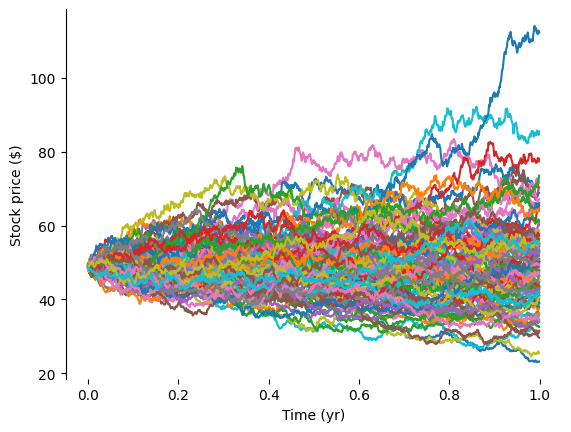

In [ ]:
for i in range(100):
    plt.plot(mc.t, mc.prices[i, :])

plt.xlabel("Time (yr)")
plt.ylabel("Stock price ($)")

ax = plt.gca()
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.savefig("GBM.png")
plt.savefig("GBM.svg")

Price, Delta and Gamma (MC vs BS)

In [ ]:
Spot = np.linspace(0.01, 100, 101)
Delta = np.zeros(Spot.shape[0])
Gamma = np.zeros(Spot.shape[0])
Vega = np.zeros(Spot.shape[0])
Theta = np.zeros(Spot.shape[0])
Val = np.zeros(Spot.shape[0])
for idx, s in tqdm(enumerate(Spot)):
    if s == 0:
        s = 0.01
    mc = MonteCarloPricer(r=0, sigma=0.25, S_0=s, T=1, dt=0.001, K=50, n=10000)
    Val[idx], Delta[idx], Gamma[idx], Vega[idx], Theta[idx] = mc.run('call')

101it [01:57,  1.16s/it]


In [ ]:
TheoPrice = np.zeros(Spot.shape[0])
TheoDelta = np.zeros(Spot.shape[0])
TheoGamma = np.zeros(Spot.shape[0])
TheoVega = np.zeros(Spot.shape[0])
TheoTheta = np.zeros(Spot.shape[0])
for idx, s in tqdm(enumerate(Spot)):
    bs = BlackScholes(r=0, sigma=0.25, S_0=s, K=50, T=1)
    TheoPrice[idx] = bs.price()
    TheoDelta[idx] = bs.delta()
    TheoGamma[idx] = bs.gamma()
    TheoVega[idx] = bs.vega()
    TheoTheta[idx] = bs.theta()

101it [00:00, 1216.76it/s]


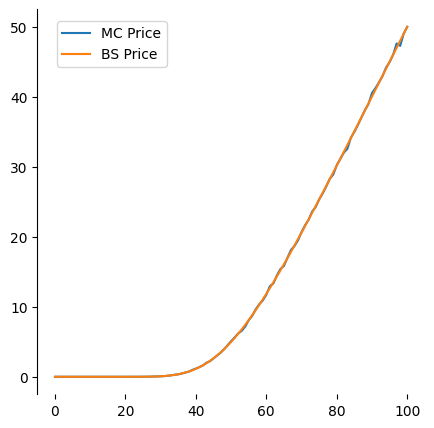

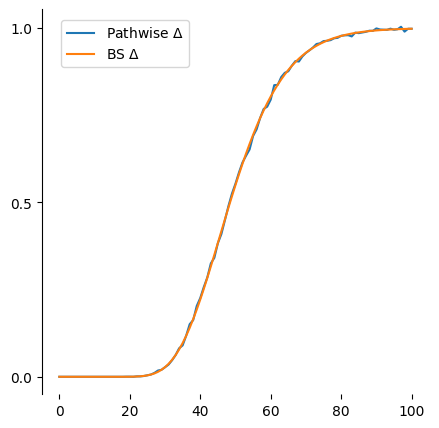

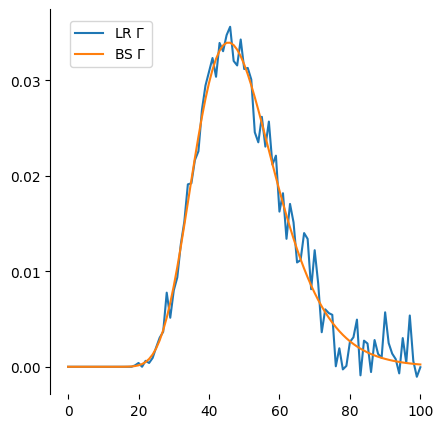

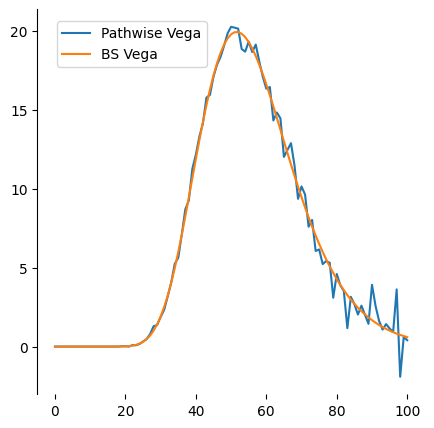

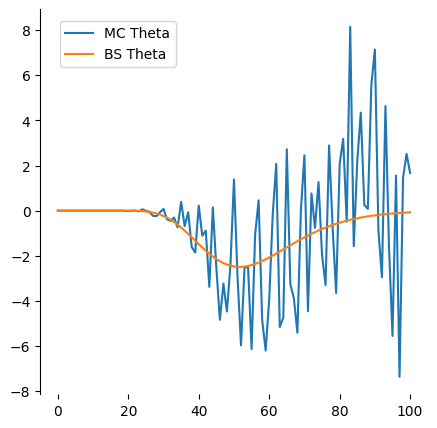

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each subplot separately
fig_price, ax_price = plt.subplots()
fig_delta, ax_delta = plt.subplots()
fig_gamma, ax_gamma = plt.subplots()
fig_vega, ax_vega = plt.subplots()
fig_theta, ax_theta = plt.subplots()

# Set the size of each figure individually
fig_price.set_size_inches((5, 5))
fig_delta.set_size_inches((5, 5))
fig_gamma.set_size_inches((5, 5))
fig_vega.set_size_inches((5, 5))
fig_theta.set_size_inches((5,5))

# Price comparison plot
ax_price.plot(Spot, Val, label='MC Price')
ax_price.plot(Spot, TheoPrice, label='BS Price')
ax_price.legend(loc=(0.05, 0.85))
ax_price.spines[['top', 'right', 'bottom']].set_visible(False)

# Delta comparison plot
ax_delta.plot(Spot, Delta, label='Pathwise $\Delta$')
ax_delta.plot(Spot, TheoDelta, label='BS $\Delta$')
ax_delta.legend(loc=(0.05, 0.85))
ax_delta.spines[['top', 'right', 'bottom']].set_visible(False)
ax_delta.set_yticks([0, 0.5, 1.0])

# Gamma comparison plot
ax_gamma.plot(Spot, Gamma, label='LR $\Gamma$')
ax_gamma.plot(Spot, TheoGamma, label='BS $\Gamma$')
ax_gamma.legend(loc=(0.05, 0.85))
ax_gamma.spines[['top', 'right', 'bottom']].set_visible(False)
ax_gamma.set_yticks([0, 0.01, 0.02, 0.03])

# Vega comparison plot
ax_vega.plot(Spot, Vega, label='Pathwise Vega')
ax_vega.plot(Spot, TheoVega, label='BS Vega')
ax_vega.legend(loc=(0.05, 0.85))
ax_vega.spines[['top', 'right', 'bottom']].set_visible(False)

# Theta comparison plot
ax_theta.plot(Spot, Theta, label='MC Theta')
ax_theta.plot(Spot, TheoTheta, label='BS Theta')
ax_theta.legend(loc=(0.05, 0.85))
ax_theta.spines[['top', 'right', 'bottom']].set_visible(False)

# Show each figure separately
plt.show(fig_price)
plt.show(fig_delta)
plt.show(fig_gamma)
plt.show(fig_vega)
plt.show(fig_theta)

# Close the figures to free up memory
plt.close(fig_price)
plt.close(fig_delta)
plt.close(fig_gamma)
plt.close(fig_vega)
plt.close(fig_theta)


Convergence of option price with N

In [ ]:
N = np.array([1000, 2000, 4000, 8000, 16000, 32000, 64000])
it = 5
Val1 = np.zeros((it, N.shape[0]))
for idx, n in tqdm(enumerate(N)):
    for i in range(it):
        mc = MonteCarloPricer(r=0, sigma=0.25, S_0=49, T=1, dt=0.001, K=50, n=n)
        Val1[i, idx], _, _, _, _ = mc.run('call')  # Updated unpacking

7it [01:18, 11.26s/it]


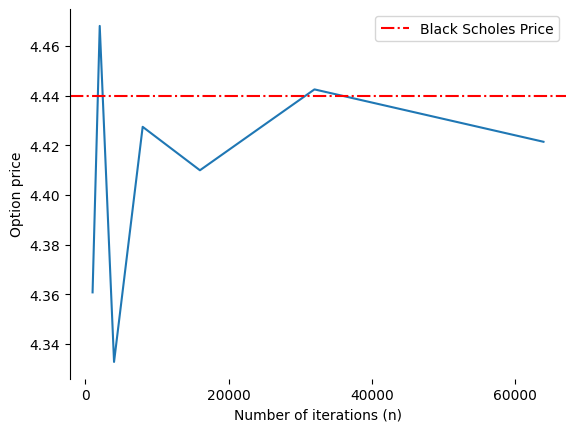

In [ ]:
plt.plot(N, Val1.mean(axis=0))
plt.xlabel("Number of iterations (n)")
plt.ylabel("Option price")
plt.axhline(4.44, linestyle='-.', color='r', label='Black Scholes Price')
plt.legend()

ax = plt.gca()
ax.set_xticks([0, 20000, 40000, 60000])
ax.spines[['top', 'right', 'bottom']].set_visible(False)

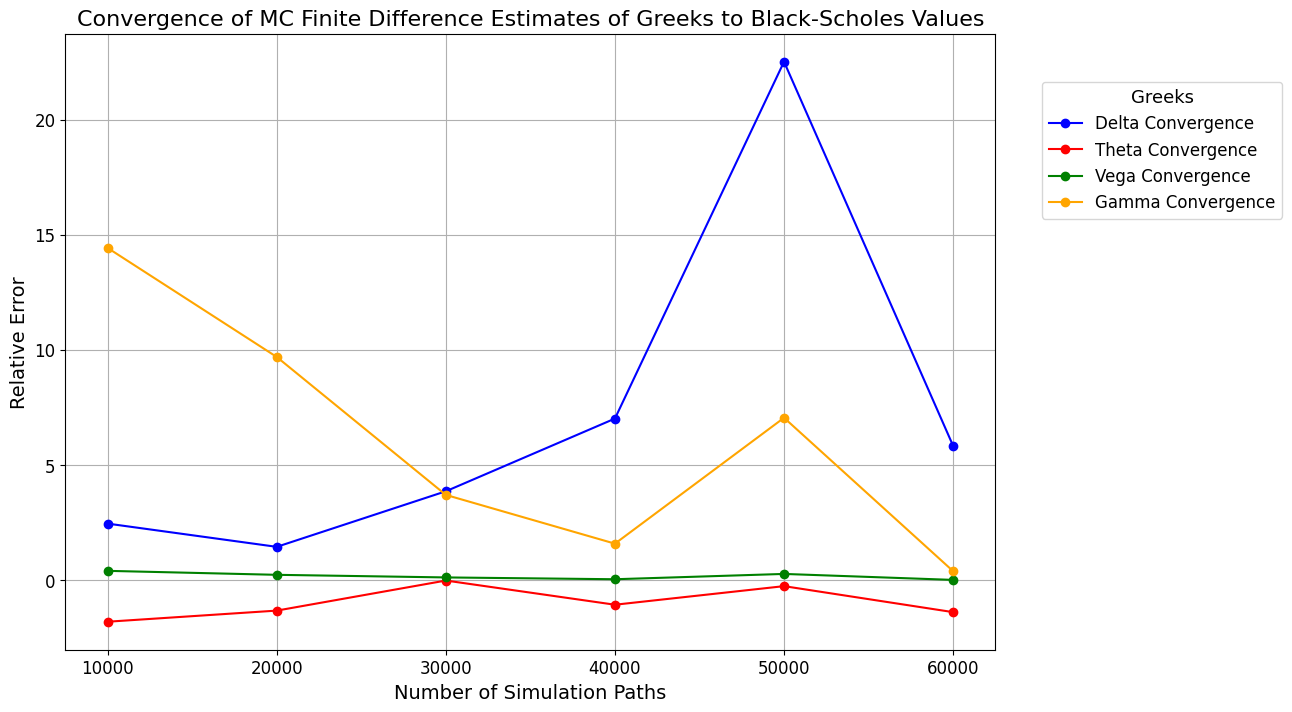

In [ ]:
#Henry's work
#Convergence of Greeks.

# Parameters
S0 = 100      # initial stock price
K = 100       # strike price
r = 0.05      # risk-free rate
sigma = 0.2   # volatility
T = 1         # time to maturity in years
dt = 1/252    # time step in years
h = 0.01      # perturbation size

def simulate_stock_price(S0, r, sigma, T, dt, paths):
    N = int(T / dt)
    Z = np.random.normal(size=(N, paths))
    S = np.zeros((N+1, paths))
    S[0] = S0
    for t in range(1, N+1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
    return S

def option_price_simulations(S, K, r, T):
    payouts = np.maximum(S[-1] - K, 0)  # For a call option
    return np.exp(-r * T) * np.mean(payouts)

def estimate_greek(S0, K, r, sigma, T, paths, dt, h, greek='delta'):
    S = None
    if greek == 'delta':
        S_up = simulate_stock_price(S0 + h, r, sigma, T, dt, paths)
        S_down = simulate_stock_price(S0 - h, r, sigma, T, dt, paths)
    elif greek == 'theta':
        S_up = simulate_stock_price(S0, r, sigma, T, dt, paths)
        S_down = simulate_stock_price(S0, r, sigma, T + h, dt, paths)
    elif greek == 'vega':
        S_up = simulate_stock_price(S0, r, sigma + h, T, dt, paths)
        S_down = simulate_stock_price(S0, r, sigma - h, T, dt, paths)
    elif greek == 'gamma':
        S_up = simulate_stock_price(S0+h, r, sigma, T, dt, paths)
        S = simulate_stock_price(S0, r, sigma, T, dt, paths)
        S_down = simulate_stock_price(S0-h, r, sigma, T, dt, paths)
    if S is None:
      price_up = option_price_simulations(S_up, K, r, T)
      price_down = option_price_simulations(S_down, K, r, T)
      return (price_up - price_down) / (2 * h)
    if S is not None:
      price_up = option_price_simulations(S_up, K, r, T)
      price = option_price_simulations(S, K, r, T)
      price_down = option_price_simulations(S_down, K, r, T)
      return (price_up - 2 * price + price_down) / (h ** 2)


def black_scholes_greeks(S, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = stats.norm.cdf(d1)
    vega = S * stats.norm.pdf(d1) * np.sqrt(T)
    theta = -S * stats.norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * stats.norm.cdf(d2)
    gamma = K * np.exp(-r * T) * stats.norm.pdf(d2) / sigma / np.sqrt(T)
    return delta, theta, vega, gamma

bs_delta, bs_theta, bs_vega, bs_gamma = black_scholes_greeks(S0, K, r, sigma, T)

path_options = [10000, 20000, 30000, 40000, 50000, 60000]
mc_delta_results, mc_theta_results, mc_vega_results, mc_gamma_results = [], [], [], []

for paths in path_options:
    mc_delta = estimate_greek(S0, K, r, sigma, T, paths, dt, h, 'delta')
    mc_theta = estimate_greek(S0, K, r, sigma, T, paths, dt, h, 'theta')
    mc_vega = estimate_greek(S0, K, r, sigma, T, paths, dt, h, 'vega')
    mc_gamma = estimate_greek(S0, K, r, sigma, T, paths, dt, h, 'gamma')

    mc_delta_results.append(abs(mc_delta - bs_delta) / bs_delta)
    mc_theta_results.append(abs(mc_theta - bs_theta) / bs_theta)
    mc_vega_results.append(abs(mc_vega - bs_vega) / bs_vega)
    mc_gamma_results.append(abs(mc_gamma - bs_gamma) / bs_gamma)



plt.figure(figsize=(12, 8))
plt.plot(path_options, mc_delta_results, 'o-', color='blue', label='Delta Convergence')
plt.plot(path_options, mc_theta_results, 'o-', color='red', label='Theta Convergence')
plt.plot(path_options, mc_vega_results, 'o-', color='green', label='Vega Convergence')
plt.plot(path_options, mc_gamma_results, 'o-', color='orange', label='Gamma Convergence')


plt.xlabel('Number of Simulation Paths', fontsize=14)
plt.ylabel('Relative Error', fontsize=14)
plt.title('Convergence of MC Finite Difference Estimates of Greeks to Black-Scholes Values', fontsize=16)
plt.legend(title="Greeks", title_fontsize='13', fontsize='12', loc=(1.05, 0.7))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
gridpoints = [10000, 20000, 30000, 40000, 50000, 60000]
deltas = []
gammas = []
vegas = []
for g in gridpoints:
    mc = MonteCarloPricer(r=0, sigma=0.25, S_0=49, T=1, dt=0.001, K=50, n=g)
    _, delta, gamma, vega, _ = mc.run('call')
    deltas.append(delta)
    gammas.append(gamma)
    vegas.append(vega)

deltas = np.array(deltas)
gammas = np.array(gammas)
vegas = np.array(vegas)


deltas_error = np.abs(deltas - bs.delta()) / bs.delta()
gammas_error = np.abs(gammas - bs.gamma()) / bs.gamma()
vegas_error = np.abs(vegas - bs.vega()) / bs.vega()


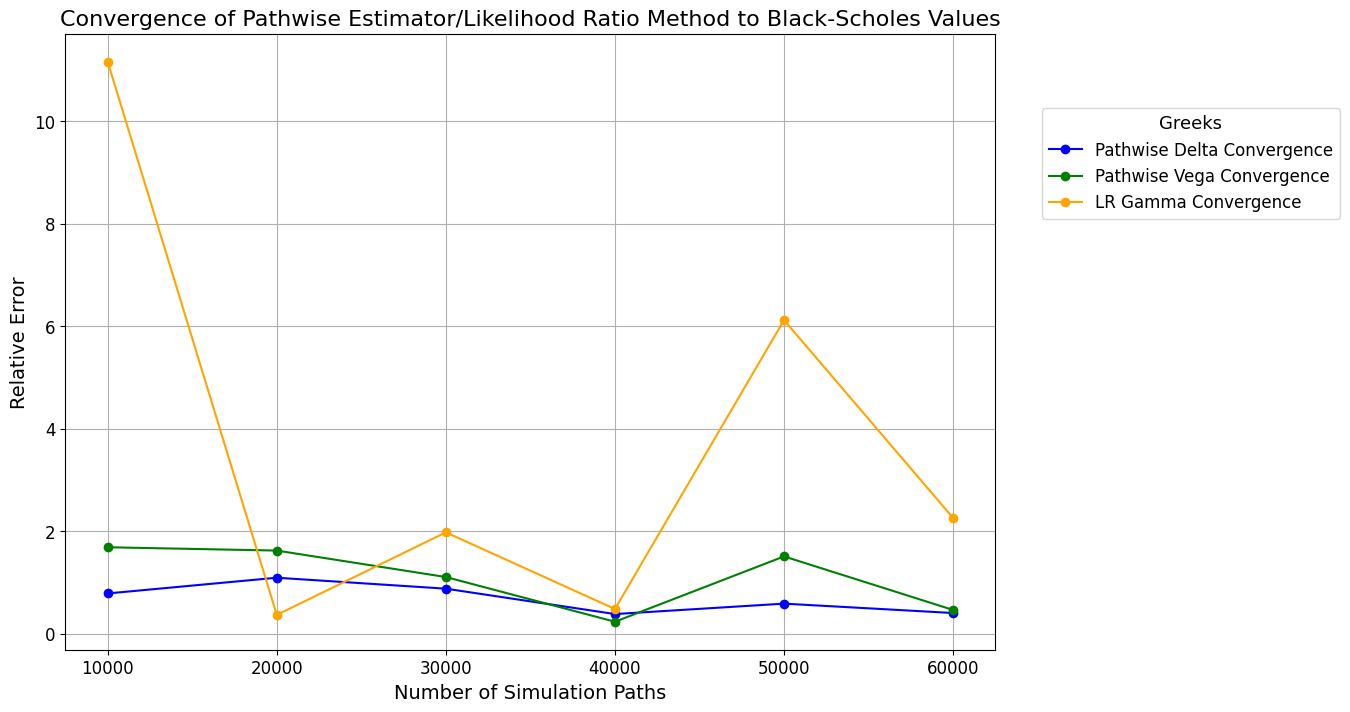

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(gridpoints, deltas_error * 100, 'o-', label='Pathwise Delta Convergence', color='blue')
plt.plot(gridpoints, vegas_error * 100, 'o-', label='Pathwise Vega Convergence', color='green')
plt.plot(gridpoints, gammas_error * 100, 'o-', label='LR Gamma Convergence', color='orange')

plt.title('Convergence of Pathwise Estimator/Likelihood Ratio Method to Black-Scholes Values', fontsize=16)
plt.xlabel('Number of Simulation Paths', fontsize=14)
plt.ylabel('Relative Error', fontsize=14)
plt.legend(title="Greeks", title_fontsize='13', fontsize='12', loc=(1.05, 0.7))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()